# Titanic EDA Data Analysis

This notebook presents an exploratory data analysis (EDA) of the Titanic passengers dataset. It includes a description of the dataset, initial data quality analysis, and basic statistics about the passengers.

## Dataset Overview

The Titanic dataset contains information about the passengers, including gender, age, ticket price, and port of embarkation. The analysis covers missing values, duplicates, and class distributions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


### Data Quality

The dataset is checked for missing values and duplicates. Basic statistics are calculated for each feature.

In [3]:
df.drop(1309, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.3+ KB


### Class Distribution

The following analysis shows the distribution of classes, ages, and ticket prices among the passengers.

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

### Survival Analysis

Relationships between passenger features and survival chances are analyzed, including the impact of gender, travel class, age, and traveling with family.

In [6]:
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Visualization: Class, Age, and Ticket Price

Charts below present the distribution of classes, ages, and ticket prices among Titanic passengers.

### Visualization: Survival by Feature

The following plots show how survival rates vary by gender, class, age, and family status.

In [7]:
male_count = df['sex'].value_counts().get('male', 0)
female_count = df['sex'].value_counts().get('female', 0)
average_value = df['fare'].mean()
survived_count = df['survived'].value_counts()
survived = survived_count[1]
not_survived = survived_count[0]

embarked_count = df['embarked'].value_counts()
for port, count in embarked_count.items():
    print(f'Liczba osób wsiadająca w porcie {port}: {count}')

print("Liczna mężczyzn na pokłądzie: ", male_count)
print("Liczba kobiet na pokładzie: ", female_count)
print(f'Ilość osób która przeżyła: {survived}')
print(f'Ilość osób, która zginęła: {not_survived}')
print(f'Srednia cena biletu wyniosła: {average_value}')

Liczba osób wsiadająca w porcie S: 914
Liczba osób wsiadająca w porcie C: 270
Liczba osób wsiadająca w porcie Q: 123
Liczna mężczyzn na pokłądzie:  843
Liczba kobiet na pokładzie:  466
Ilość osób która przeżyła: 500
Ilość osób, która zginęła: 809
Srednia cena biletu wyniosła: 33.29547928134557


In [8]:
value_counts = df['home.dest'].value_counts() 
value_counts = value_counts.apply(lambda x: f'{x} osób płynęło w tym kierunku')
print(value_counts.head(10))

home.dest
New York, NY                            64 osób płynęło w tym kierunku
London                                  14 osób płynęło w tym kierunku
Montreal, PQ                            10 osób płynęło w tym kierunku
Paris, France                            9 osób płynęło w tym kierunku
Cornwall / Akron, OH                     9 osób płynęło w tym kierunku
Wiltshire, England Niagara Falls, NY     8 osób płynęło w tym kierunku
Winnipeg, MB                             8 osób płynęło w tym kierunku
Philadelphia, PA                         8 osób płynęło w tym kierunku
Belfast                                  7 osób płynęło w tym kierunku
Sweden Winnipeg, MN                      7 osób płynęło w tym kierunku
Name: count, dtype: object


### Visualization: Embarkation Ports

This section analyzes the number of people boarding at each port and its relation to survival.

### Visualization: Family Size

Charts show the impact of traveling with family on survival chances.

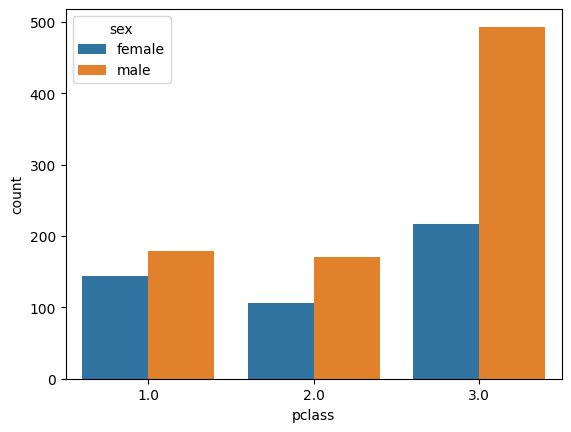

In [9]:
sex_df = df["sex"]
pclass_df = df["pclass"]

sex_counts = sex_df.value_counts()

pclass_counts = pclass_df.value_counts()

sns.countplot(x = 'pclass', hue = 'sex', data = df)

# Show the plot
plt.show()

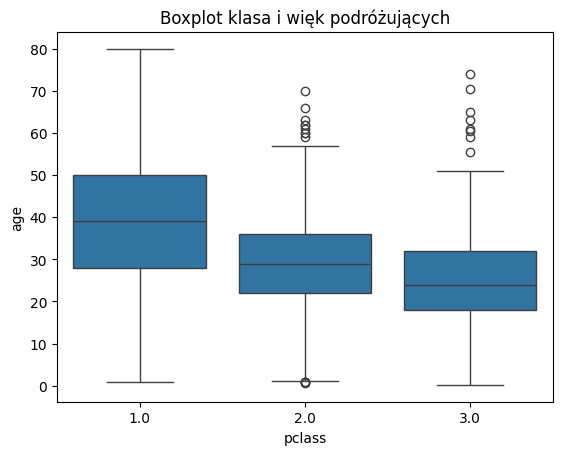

In [10]:
sns.boxplot(x="pclass", y="age", data=df)
plt.title('Boxplot klasa i więk podróżujących')
plt.xlabel('pclass')  
plt.ylabel('age') 
plt.show()

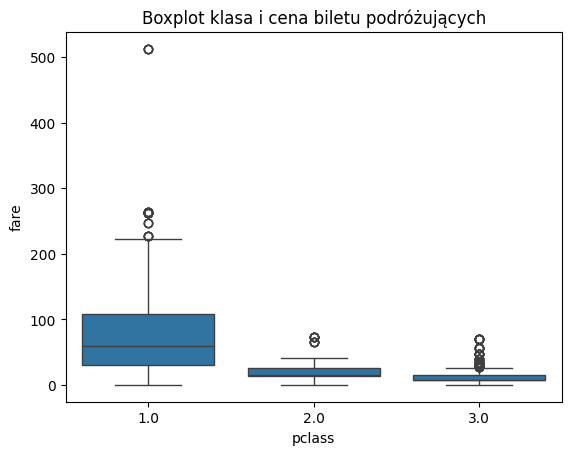

In [11]:
sns.boxplot(x="pclass", y="fare", data=df)
plt.title('Boxplot klasa i cena biletu podróżujących')
plt.xlabel('pclass')  
plt.ylabel('fare')  
plt.show()

### Summary of Findings

The analysis provides insights into the main factors affecting survival on the Titanic and highlights key patterns in the data.

### Next Steps

Further modeling and prediction tasks can be performed using the insights from this EDA.

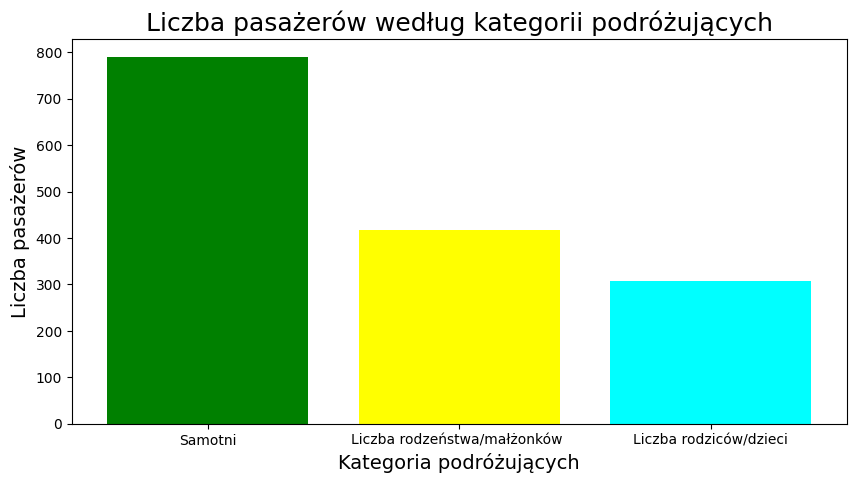

In [12]:
solo_passengers = df[(df["sibsp"] == 0) & (df["parch"] == 0)]

with_siblings = df[df["sibsp"] > 0]

with_parents = df[df["parch"] > 0]

data = [len(solo_passengers), len(with_siblings), len(with_parents)]
categories = ["Samotni", "Liczba rodzeństwa/małżonków ", "Liczba rodziców/dzieci"]

plt.figure(figsize=(10,5))
plt.bar(categories, data, color=["green", "yellow", "cyan"])
plt.xlabel("Kategoria podróżujących", size=14)
plt.ylabel("Liczba pasażerów", size=14)
plt.title("Liczba pasażerów według kategorii podróżujących", size=18)
plt.show()

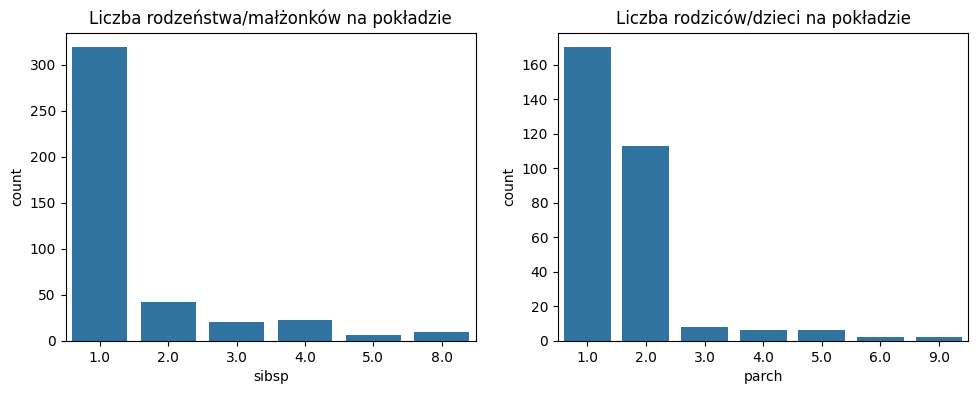

In [13]:
sibling_passengers = df[df['sibsp'] > 0]
parent_passengers = df[df['parch'] > 0]

plt.figure(figsize=(18, 4))

plt.subplot(132)
sns.countplot(x='sibsp', data=sibling_passengers)
plt.title('Liczba rodzeństwa/małżonków na pokładzie')

plt.subplot(133)
sns.countplot(x='parch', data=parent_passengers)
plt.title('Liczba rodziców/dzieci na pokładzie')

plt.show()

In [14]:
df[df['parch'] >= 9]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1179,3.0,0.0,"Sage, Mr. John George",male,NaN,1.0,9.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1180,3.0,0.0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1.0,9.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


### Final Remarks

This EDA provides a foundation for further machine learning and prediction tasks using the Titanic dataset.

### Next Steps

Further modeling and prediction tasks can be performed using the insights from this EDA.

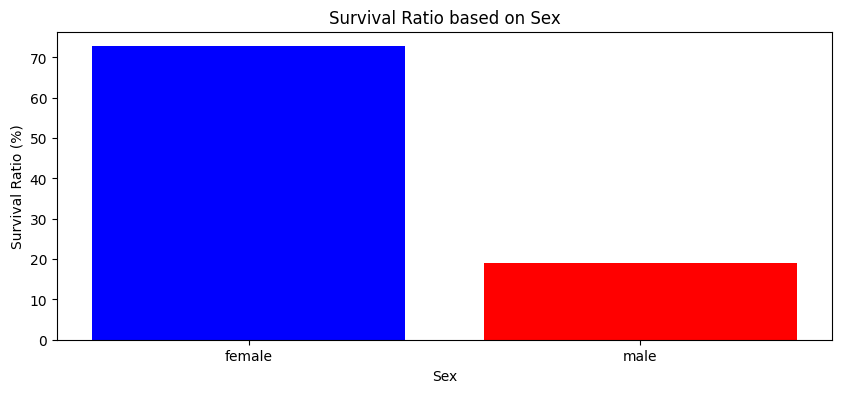

In [15]:
survival_ratio = df.groupby("sex")["survived"].mean() * 100

plt.figure(figsize=(10,4))
plt.bar(survival_ratio.index, survival_ratio.values, color=['blue', 'red'])
plt.xlabel("Sex")
plt.ylabel("Survival Ratio (%)")
plt.title("Survival Ratio based on Sex")
plt.show()

### End of Notebook

Thank you for exploring the Titanic dataset EDA!

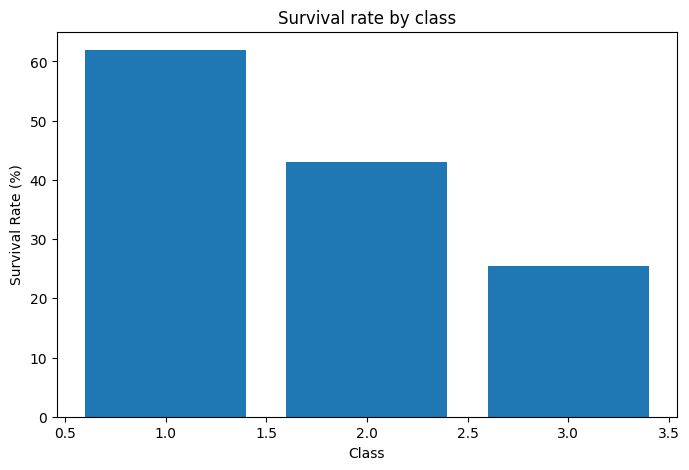

In [16]:
df['survived'] = pd.to_numeric(df['survived'])
df['pclass'] = pd.to_numeric(df['pclass'])

survival_rate = df.groupby('pclass')['survived'].mean()

plt.figure(figsize=(8,5))
plt.bar(survival_rate.index, survival_rate.values * 100)
plt.xlabel('Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival rate by class')
plt.show()

* Najliczniejsza grupa uratowanych pasażerów płyneła w pierwszej klasie i przezyło 60% pasażerów
* W klasie drugiej było to nieco ponad 40%
* W klasie trzecie niestety nieco ponad 20% pasażerów przeżyło katastrofe 
#### Podsumowując klasa podrózujących miała duży wpływ na szanse przeżycia

# Szansa na przeżycie według wieku

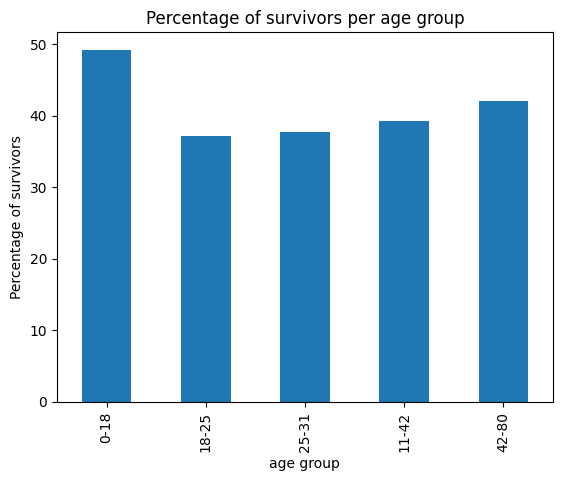

In [21]:
bins = [0, 18, 25, 31, 42, 80]
labels = ['0-18', '18-25', '25-31', '11-42', '42-80']
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

grouped = df.groupby(['binned_age', 'survived'], observed=False).size().unstack()
grouped['total'] = grouped[0] + grouped[1]
grouped['percentage_survivors'] = grouped[1] / grouped['total'] * 100

grouped['percentage_survivors'].plot(kind='bar')
plt.title('Percentage of survivors per age group')
plt.xlabel('age group')
plt.ylabel('Percentage of survivors')
plt.show()

**Z wykresu możemy zaobserwować że wiek raczej nie miał dużego wpływu na to czy ktoś przeżył, największa liczba najmłodszych pasażerów którzy przeżyli jest spowodowana tym że pewnie w pierwszej kolejności były ratowane dzieci albo nawet rodzice poświecali sie dla nich** 

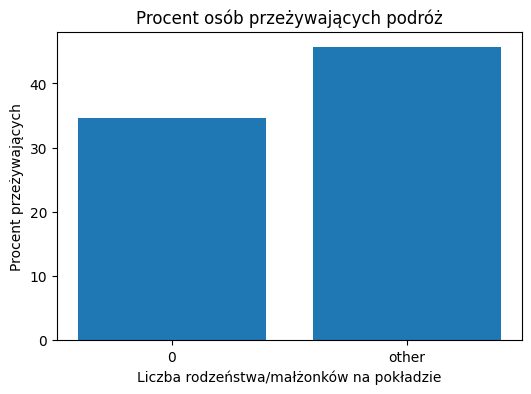

In [18]:
df['sibsp_group'] = df['sibsp'].apply(lambda x: '0' if x == 0 else 'other')
survival_rates = df.groupby('sibsp_group')['survived'].mean()

plt.figure(figsize=(6, 4))
plt.bar(survival_rates.index, survival_rates.values * 100)
plt.xlabel('Liczba rodzeństwa/małżonków na pokładzie')
plt.ylabel('Procent przeżywających')
plt.title('Procent osób przeżywających podróż')
plt.show()

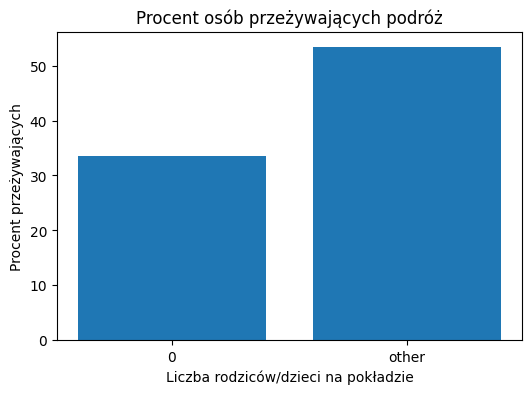

In [19]:
df['parch_group'] = df['parch'].apply(lambda x: '0' if x == 0 else 'other')

survival_rates = df.groupby('parch_group')['survived'].mean()

plt.figure(figsize=(6, 4))
plt.bar(survival_rates.index, survival_rates.values * 100)
plt.xlabel('Liczba rodziców/dzieci na pokładzie')
plt.ylabel('Procent przeżywających')
plt.title('Procent osób przeżywających podróż')
plt.show()

**Osoby podróżujące samotnie miały mniejszą szansę na przeżycie**

# Podsumowanie

* Katastrofę przeżyło ponad 70% kobiet i tylko 20% mężczyzn. Myślę że było to spowodowane tym że mężczyzn było 2x więcej i podrużowali oni w większości samotnie
* Klasa i cena biletu miała spory wpływ na przeżywalność pasażerów
* Duża przezywalność najmłodszych osób pewnie była spowodowana że w pierwszej kolejności ratowano matki z dziećmi
* Osoby najzamożniejsze i te które wydały najwiecej pieniedzy na podróż przeżyły
* Najliczniejsza rodzina nie przeżyła katastrofy 

In [23]:
!jupyter nbconvert titanic.ipynb --to html --no-input --no-prompt --output titanic.html

[NbConvertApp] Converting notebook titanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 571608 bytes to titanic.html
